# CRISP-DM Beispiel: California Housing
In diesem Notebook begleiten wir den Data-Science-Prozess am Beispiel der Vorhersage von Hauspreisen in Kalifornien.
Wir nutzen einen offenen Datensatz und Python mit pandas, matplotlib und scikit-learn.

## 1. Business Understanding
Ziel: Wie hängen Lage, Größe und andere Merkmale mit dem Hauswert zusammen? Kann man den Wert vorhersagen?

## 2. Data Understanding
Wir laden den California Housing Datensatz und verschaffen uns einen ersten Überblick.

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame # df is a pandas DataFrame, "df" is its variable name
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Spaltennamen ausgeben

In [13]:
print(list(df.columns))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


Erste Zeile anzeigen (die Werte werden hier untereinander aufgelistet, es ist aber die erste Zeile!)

In [17]:
print(df.iloc[0])

MedInc           8.325200
HouseAge        41.000000
AveRooms         6.984127
AveBedrms        1.023810
Population     322.000000
AveOccup         2.555556
Latitude        37.880000
Longitude     -122.230000
MedHouseVal      4.526000
Name: 0, dtype: float64


Ersten Wert der ersten Zeile anzeigen

In [15]:
print(df.iloc[0,0])

8.3252


## 3. Erste Datenanalyse und Visualisierung
Wir schauen uns die Verteilung des Hauswerts und wichtige Merkmale an.

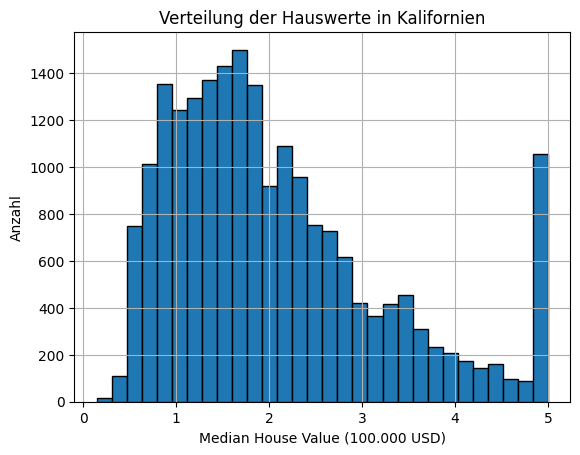

In [4]:
import matplotlib.pyplot as plt
df['MedHouseVal'].hist(bins=30, edgecolor='black')
plt.xlabel('Median House Value (100.000 USD)')
plt.ylabel('Anzahl')
plt.title('Verteilung der Hauswerte in Kalifornien')
plt.show()

## 4. Data Preparation
Wir prüfen auf fehlende Werte und bereiten die Daten für die Modellierung vor.

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Was tun bei fehlenden Werten?
Falls im Datensatz fehlende Werte vorhanden wären, könnten wir verschiedene Strategien anwenden:

- **Entfernen der Zeilen/Spalten:** Wenn nur wenige Werte fehlen, kann man die betroffenen Zeilen oder Spalten löschen.
- **Auffüllen (Imputation):** Fehlende Werte können durch den Mittelwert, Median oder andere statistische Kennzahlen ersetzt werden.
- **Modellbasierte Imputation:** Komplexere Methoden wie KNN-Imputation oder Regressionsmodelle können verwendet werden.

Die Wahl der Methode hängt von der Datenmenge, dem Kontext und der Bedeutung der fehlenden Werte ab.

In [ ]:
# Beispiel: Fehlende Werte behandeln
import numpy as np
df_missing = df.copy()
df_missing.iloc[0, 0] = np.nan  # künstlich einen fehlenden Wert erzeugen
print('Vorher:', df_missing.isnull().sum())

# 1. Variante: Zeile mit fehlendem Wert entfernen
df_drop = df_missing.dropna()
print('Nach Entfernen:', df_drop.isnull().sum())

# 2. Variante: Fehlende Werte mit Mittelwert auffüllen
df_fill = df_missing.fillna(df_missing.mean(numeric_only=True))
print('Nach Auffüllen:', df_fill.isnull().sum())

Vorher: MedInc         1
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Nach Entfernen: MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Nach Auffüllen: MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## 5. Ausblick: Modellierung und Evaluation
Im nächsten Schritt werden wir ein erstes Vorhersagemodell bauen und bewerten.